<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-605467-1697804363/blob/main/alzheimers_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls


drive  sample_data


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
!unzip "/content/drive/MyDrive/Alzheimers detection/dataset.zip" -d "/content"


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/MildDemented/mildDem21.jpg  
  inflating: /content/dataset/train/MildDemented/mildDem210.jpg  
  inflating: /content/dataset/train/MildDemented/mildDem211.jpg  
  inflating: /content/dataset/train/MildDemented/mildDem212.jpg  
  inflating: /content/dataset/train/MildDemented/mildDem213.jpg  
  inflating: /content/dataset/train/MildDemented/mildDem214.jpg  
  inflating: /content/dataset/train/MildDemented/mildDem215.jpg  
  inflating: /content/dataset/train/MildDemented/mildDem216.jpg  
  inflating: /content/dataset/train/MildDemented/mildDem217.jpg  
  inflating: /content/dataset/train/MildDemented/mildDem218.jpg  
  inflating: /content/dataset/train/MildDemented/mildDem219.jpg  
  inflating: /content/dataset/train/MildDemented/mildDem22.jpg  
  inflating: /content/dataset/train/MildDemented/mildDem220.jpg  
  inflating: /content/dataset/train/MildDemented/mildDem221.jpg  
  inflating: /content/datas

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [29]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [31]:
train_datagen=ImageDataGenerator(rescale=1./255)

test_datagen=ImageDataGenerator(rescale=1./255)

5.387060165405273

In [ ]:
def list_directories_in_directory(directory_path):
    try:
        directory_list = []
        if os.path.isdir(directory_path):
            items = os.listdir(directory_path)
            for item in items:
                item_path = os.path.join(directory_path, item)
                if os.path.isdir(item_path):
                    directory_list.append(item)

        return directory_list.sort()

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

In [32]:
classNames=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']


In [33]:
test=test_datagen.flow_from_directory("dataset/test",
                                      classes=classNames,
                                      color_mode="grayscale",
                                      class_mode="categorical",
                                      batch_size=32,
                                      keep_aspect_ratio=True)

Found 1279 images belonging to 4 classes.


In [34]:
train=train_datagen.flow_from_directory("dataset/train",
                                      classes=classNames,
                                      color_mode="grayscale",
                                      class_mode="categorical",
                                      batch_size=32,
                                      keep_aspect_ratio=True)

Found 5121 images belonging to 4 classes.


In [47]:
1279/32

39.96875

# Model Building

In [39]:
model=keras.Sequential([
    layers.Conv2D(filters=16,kernel_size=(4,4),activation='relu',use_bias=True,bias_initializer='random_normal'),
    layers.MaxPool2D(strides=(1,1)),
    layers.Conv2D(filters=32,kernel_size=(4,4),activation='relu',use_bias=True,bias_initializer='random_normal'),
    layers.MaxPool2D(strides=(1,1)),
    layers.Conv2D(filters=64,kernel_size=(4,4),activation='relu',use_bias=True,bias_initializer='random_normal'),
    layers.MaxPool2D(strides=(1,1)),
    layers.Dropout(rate=0.25),
    layers.Flatten(),


    layers.Dense(units=32,use_bias=True,bias_initializer='random_normal',activation='relu'),
    layers.Dropout(rate=0.25),
    layers.Dense(units=16,use_bias=True,bias_initializer='random_normal',activation='relu'),
    layers.Dense(units=8,use_bias=True,bias_initializer='random_normal',activation='relu'),
    layers.Dense(units=4,use_bias=True,bias_initializer='random_normal',activation='softmax')
                       ])

In [40]:
with tf.device("/GPU:0"):
  model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")


In [60]:
history=0
with tf.device("/GPU:0"):
  history=model.fit(train,steps_per_epoch=161,epochs=5,validation_data=test,validation_steps=40)

Epoch 1/5
161/161 [==============================] - 44s 275ms/step - loss: 0.1732 - accuracy: 0.9459 - val_loss: 4.3481 - val_accuracy: 0.6013
Epoch 2/5
161/161 [==============================] - 44s 274ms/step - loss: 0.1687 - accuracy: 0.9490 - val_loss: 5.0139 - val_accuracy: 0.5801
Epoch 3/5
161/161 [==============================] - 44s 274ms/step - loss: 0.1615 - accuracy: 0.9518 - val_loss: 4.5455 - val_accuracy: 0.5966
Epoch 4/5
161/161 [==============================] - 44s 272ms/step - loss: 0.1627 - accuracy: 0.9520 - val_loss: 4.3783 - val_accuracy: 0.5872
Epoch 5/5
161/161 [==============================] - 44s 273ms/step - loss: 0.1588 - accuracy: 0.9529 - val_loss: 4.1747 - val_accuracy: 0.5504


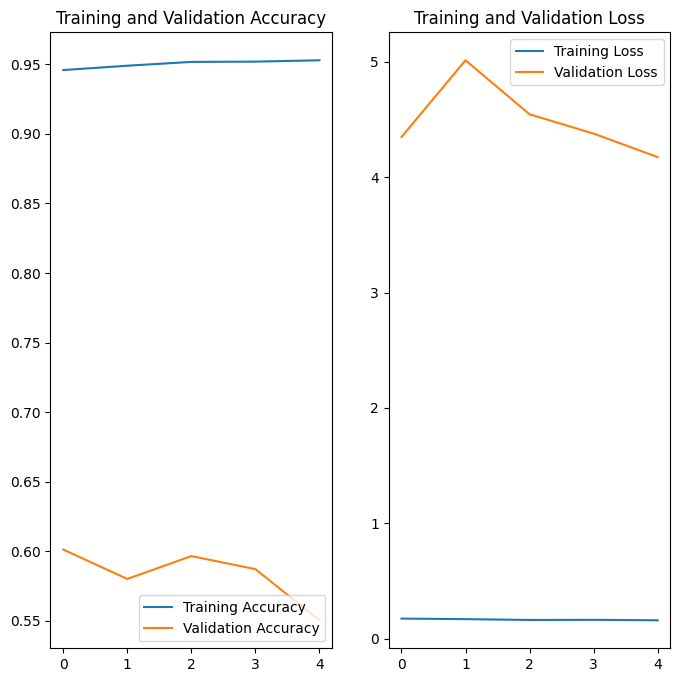

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, None, None, 16)    272       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, None, None, 16)    0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, None, None, 32)    8224      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, None, None, 32)    0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, None, None, 64)    32832     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, None, None, 64)   

In [48]:
pred=model.predict(test,batch_size=32)

40/40 [==============================] - 2s 57ms/step


In [56]:
def return_pred(predictions):
  pred_list=[]
  for prediction in predictions:
    temp={}
    for i in range(len(prediction)):
      temp[classNames[i]]=prediction[i]
    pred_list.append(temp)

  return pred_list
def return_acc_list(predictions):
  pred_list=[]


In [63]:
results=model.evaluate(train)

161/161 [==============================] - 10s 60ms/step - loss: 0.0656 - accuracy: 0.9885


In [65]:
print(f"accuracy: {results[1]*100}%\t loss: {results[0]*100}%")

accuracy: 98.84788393974304%	 loss: 6.559807062149048%


In [67]:
model.save("/content/drive/MyDrive/Colab Notebooks/models/alzheimer_detection.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
